### Linear Regression의 원리

- 어느 선이 가장 데이터를 잘 설명하는 선인지 찾기

- 최적의 라인 찾기: Minimum RSS의 최소인 것이 Linear Regression으로 찾게 됨

   - MSE 이용

- Grident Descent: 머신러닝 알고리즘이 기울기와 y절편을 움직여볼 때 어느 방향으로 에러가 줄어드는지 강도를 알고 움직인다.(효율적으로 기울기와 y절편을 찾는 이유)

- 데이터를 해석하기 용이하다.

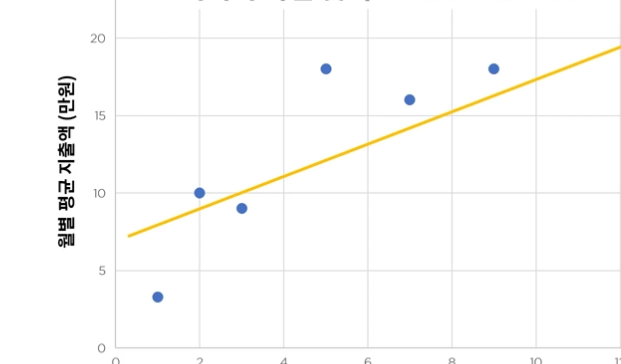


### 분석의 목적

새로운 데이터가 들어올 때 머신러닝 모델이 새로운 고객이 얼마나 사용할지에 대한 예측

#### 데이터

- 고객의 연간 지출액

- 서비스를 웹/앱에서 사용한 시간

- 멤버쉽 기간





#### 컬럼 설명(예측해야할 종석 변수)

- Email: 고객 이메일

- Address: 고객 주소

- Avatar: 고객 아바타

- Avg.Seesion Length: 얼마나 오랫동안 접속했나

- Time on App: 앱 접속시간

- Time on web: 웹 접속 시간

- Length of Membership:가입한지 얼마나 되었는가

- yearly amount spent: 고객이 연간 얼마나 썼나

### 데이터 확인

In [5]:
#필요한 라이브러리 활용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#데이터 읽기와 변수에 할당
data= pd.read_csv('/content/ecommerce.csv')
data

In [ ]:
data.head() #데이터 앞부분 5행 불러오기

In [ ]:
data.tail() #데이터 뒷부분 5행 불러오기

In [8]:
data.info() 
#500 non-null: 500개 데이터 모두 null값이 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
data.describe()
#데이터의 전반적인 내용(데이터 규모 파악)
#max와 75%를 통해서 이상치를 파악할 수 있으니 주의 깊게 보기 
# 둘 사이의 gap 보기

### 데이터 손질

- 텍스트 데이터 주의깊게 보기(Email, Address, Avatar)

- 불필요한 텍스트 컬럼 삭제

In [12]:
#덮어쓰기는 확실한 컬럼을 날릴 때만 사용한다.
data = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership' ,'Yearly Amount Spent']]

In [ ]:
data

#### Train Test Split

- 데이터를 분리하는 이유는 훈련된 데이터에만 잘 반응하는 모델을 만들지 않고 새로운 데이터에도 반응을 잘하는 데이터를 만들기 위해서 훈련과 테스트를 분리합니다.

- 여기서 굳이 분리해야하나요? 라고 생각을 하신다면, 새로운 데이터를 기다리면 시간이 너무 오래 걸리고 업데이트도 늦어져서 트렌드에 맞는 분석을 방해할 수 있습니다.

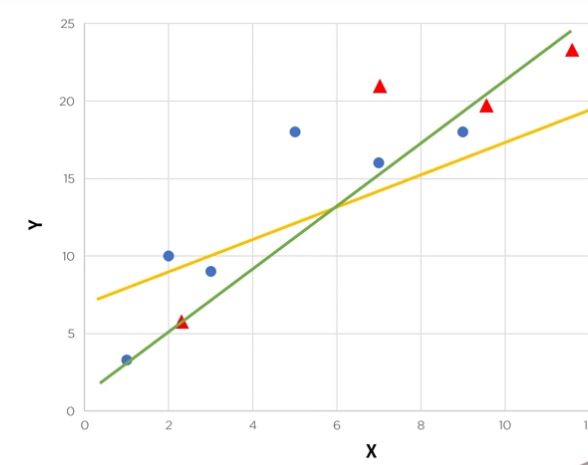

In [14]:
#사이킷런은 트리구조이기에 쓰고 싶은 것만 쓰는 게 효율적이다.
from sklearn.model_selection import train_test_split

In [15]:
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [16]:
y = data['Yearly Amount Spent']

In [19]:
#데이터셋 분리
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [20]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
model = sm.OLS(y_train, X_train)#Linear regression

In [22]:
model = model.fit()

In [ ]:
model.summary()

In [26]:
pred = model.predict(X_test)

In [ ]:
model.predict(X_test) #모델이 예측

In [ ]:
y_test #실제 테스트

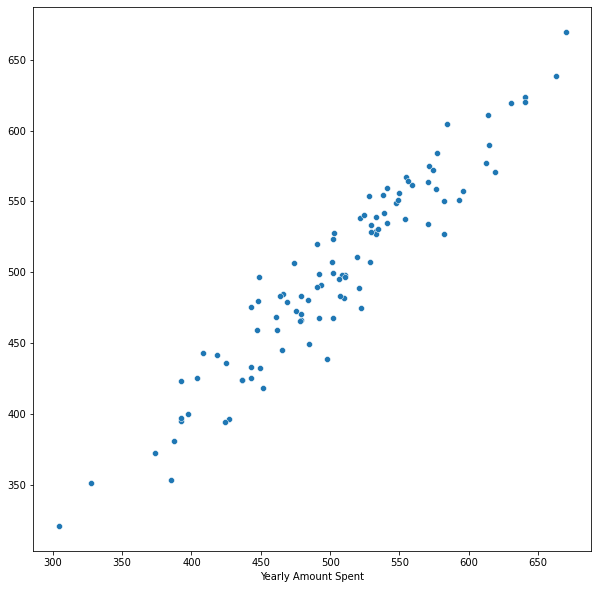

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test, y=pred)

In [30]:
#MSE 구하기

from sklearn.metrics import mean_squared_error


In [31]:
mean_squared_error(y_test, pred)
#단순한 숫자 하나로 이 모델의 예측력을 평가할 수는 없으니 여러 개를 비교해보자

482.28901390889644

In [33]:
#RMSE구하기 : 루트를 이용하기에 숫자가 줄어드는 효과!
np.sqrt(mean_squared_error(y_test, pred))

21.961079525125726

### R-squared, Coefficient, P-value

**R-squared**

- 변수가 많으면 무조건 올라간다.

- 얼마나 개선이 되었는지를 나타내는 지표이기에 클수록 좋은 모델(0.8이상이면 good)

- Adj.가 더욱 적절한 평가 기준

   - 변수가 몇 개 들어가는지를 가중치를 매김

   - 변수가 많아도 무조건적으로 올라가진 않다.

   - 모델 비교 시 좋다

<br>

**Coef**

- 직선의 기울기

- 변수의 영향력(강도와 방향)

<br>

**P-Value**

- 신뢰할 수 있는 결과인가 확인하는 척도

- 0.05이하면 양호

### Pred 함수

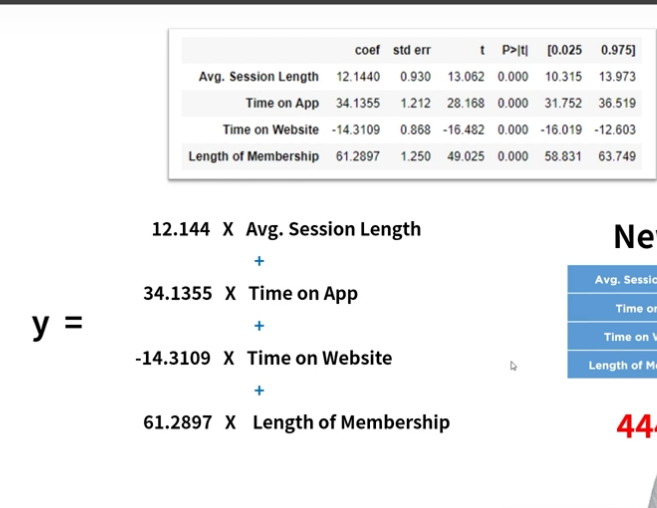